In [95]:
#https://cyan91.tistory.com/36?category=132064

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks')


https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv

https://github.com/guipsamora/pandas_exercises/blob/master/07_Visualization/Online_Retail/Exercises_with_solutions_code.ipynb

In [3]:
path ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

In [4]:
online_retail = pd.read_csv(path,encoding='latin1')
online_retail.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  
5  12/1/10 8:26       7.65     17850.0  United Kingdom  
6  12/1/10 8:26       4.25     17850.0  United Kingdom  
7  12/1/10 8:28       1.85     17850.0  United Kingdom  
8  12/1/10 8:28       1.85     17850.0  United Kingdom  
9  12/1/10 8:34       1.69     13047.0  United Kingdom

In [5]:
countries = online_retail.groupby('Country').sum()
countries = countries.sort_values(by='Quantity',ascending=False)[1:11]

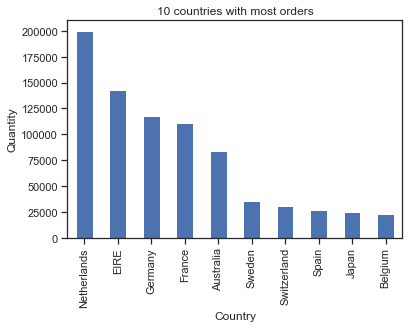

In [6]:
countries['Quantity'].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('10 countries with most orders')
plt.show()

In [7]:
online_retail = online_retail[online_retail.Quantity > 0]
online_retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [18]:
customers = online_retail.groupby(['CustomerID','Country']).sum()

len(online_retail[online_retail.CustomerID ==12347.0])

182

In [17]:
customers = customers[customers.UnitPrice > 0]
customers.UnitPrice.dtype

dtype('float64')

In [11]:
customers['Country'] = customers.index.get_level_values(1)

C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
top3_countries = ['Netherlands','EIRE','Germany']
customers = customers[customers['Country'].isin(top3_countries)]
customers

Quantity  UnitPrice      Country
CustomerID Country                                      
12426.0    Germany           258     118.09      Germany
12427.0    Germany           533     142.26      Germany
12468.0    Germany           366     133.57      Germany
12471.0    Germany          8212    1978.17      Germany
12472.0    Germany          4148     812.81      Germany
...                          ...        ...          ...
14016.0    EIRE             2125     635.88         EIRE
14156.0    EIRE            57885    5357.68         EIRE
14335.0    Germany           379     144.24      Germany
14646.0    Netherlands    197491    5176.09  Netherlands
14911.0    EIRE            80515   26185.72         EIRE

[106 rows x 3 columns]

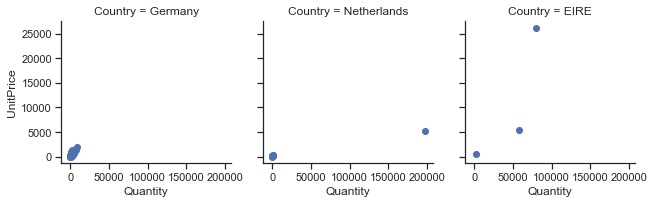

In [16]:
#Graphic section

g = sns.FacetGrid(customers, col='Country')
g.map(plt.scatter,'Quantity','UnitPrice', alpha=1)
g.add_legend()

In [20]:
display(online_retail[online_retail.CustomerID == 12347.0].sort_values(by='UnitPrice', ascending = False))
display(online_retail[online_retail.CustomerID == 12346.0].sort_values(by='UnitPrice', ascending = False).head())

InvoiceNo StockCode                          Description  Quantity  \
428966    573511     22423             REGENCY CAKESTAND 3 TIER         6   
286637    562032     22423             REGENCY CAKESTAND 3 TIER         3   
72267     542237     22423             REGENCY CAKESTAND 3 TIER         3   
148300    549222     22423             REGENCY CAKESTAND 3 TIER         3   
428967    573511     23173                REGENCY TEAPOT ROSES          2   
...          ...       ...                                  ...       ...   
428979    573511     23506         MINI PLAYING CARDS SPACEBOY         20   
535013    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
535014    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   
220583    556201     17021               NAMASTE SWAGAT INCENSE        36   
148306    549222     16008  SMALL FOLDING SCISSOR(POINTED EDGE)        24   

           InvoiceDate  UnitPrice  CustomerID  Country  
428966  10/31/11 12:25      12.75     12347.0  Iceland  
286637     8/2/11 8:48      12.75     12347.0  Iceland  
72267    1/26/11 14:30      12.75     12347.0  Iceland  
148300    4/7/11 10:43      12.75     12347.0  Iceland  
428967  10/31/11 12:25       9.95     12347.0  Iceland  
...                ...        ...         ...      ...  
428979  10/31/11 12:25       0.42     12347.0  Iceland  
535013   12/7/11 15:52       0.42     12347.0  Iceland  
535014   12/7/11 15:52       0.42     12347.0  Iceland  
220583    6/9/11 13:01       0.30     12347.0  Iceland  
148306    4/7/11 10:43       0.25     12347.0  Iceland  

[182 rows x 8 columns]

InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   

         InvoiceDate  UnitPrice  CustomerID         Country  
61619  1/18/11 10:01       1.04     12346.0  United Kingdom

In [25]:
sales_vol = online_retail.groupby(['Country']).Quantity.sum().sort_values(ascending=False)
sales_vol

Country
United Kingdom          4733819
Netherlands              200937
EIRE                     147447
Germany                  119263
France                   112104
Australia                 84209
Sweden                    36083
Switzerland               30630
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16258
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Hong Kong                  4773
Israel                     4409
Poland                     3684
Unspecified                3300
Canada                     2763
Iceland                    2458
USA                        2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


In [26]:
top3 = sales_vol.index[1:4]

In [27]:
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [28]:
online_retail['revenue'] = online_retail.UnitPrice*online_retail.Quantity

In [29]:
online_retail

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  revenue  
0        12/1/10 8:26       2.55     17850.0  United Kingdom    15.30  
1        12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  
2        12/1/10 8:26       2.75     17850.0  United Kingdom    22.00  
3        12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  
4        12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  
...               ...        ...         ...             ...      ...  
541904  12/9/11 12:50       0.85     12680.0          France    10.20  
541905  12/9/11 12:50       2.10     12680.0          France    12.60  
541906  12/9/11 12:50       4.15     12680.0          France    16.60  
541907  12/9/11 12:50       4.15     12680.0          France    16.60  
541908  12/9/11 12:50       4.95     12680.0          France    14.85  

[531285 rows x 9 columns]

In [48]:
grouped = online_retail[(online_retail.Country.isin(top3))].groupby(['CustomerID','Country'])
plottable = grouped['Quantity','revenue'].agg('sum')
plottable['AvgPrice'] = plottable.revenue / plottable.Quantity
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Quantity   revenue  AvgPrice  Country
CustomerID Country                                       
12426.0    Germany       258    582.73  2.258643  Germany
12427.0    Germany       533    825.80  1.549343  Germany
12468.0    Germany       366    729.54  1.993279  Germany
12471.0    Germany      8212  19824.05  2.414034  Germany
12472.0    Germany      4148   6572.11  1.584405  Germany

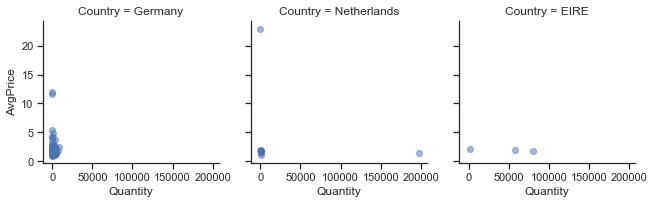

In [49]:
g = sns.FacetGrid(plottable, col='Country')
g.map(plt.scatter, 'Quantity','AvgPrice',alpha=0.5)
g.add_legend()

C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


[]

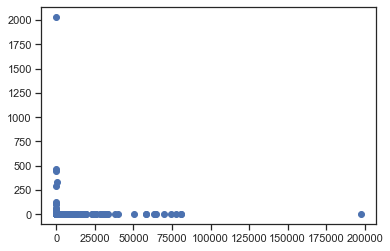

In [47]:
grouped = online_retail.groupby(['CustomerID'])
plottable = grouped['Quantity','revenue'].agg('sum')
plottable['AvgPrice'] = plottable.revenue / plottable.Quantity

plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()

In [51]:
grouped = online_retail.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity':'sum','revenue':'sum'})

[]

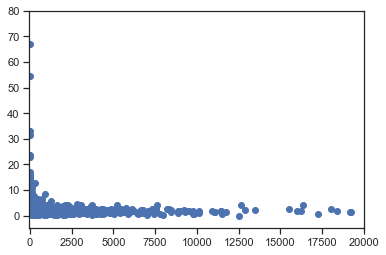

In [54]:
plottable['AvgPrice'] = plottable.revenue / plottable.Quantity
plt.scatter(plottable.Quantity, plottable.AvgPrice)

plt.xlim(-40,20000)
plt.ylim(-5,80)

plt.plot()

In [56]:

#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0
price_end = 50
price_interval = 1

buckets = np.arange(price_start, price_end, price_interval)

revenue_per_price = online_retail.groupby(pd.cut(online_retail.UnitPrice, buckets)).revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: revenue, dtype: float64

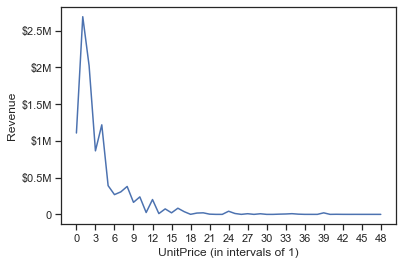

In [59]:
revenue_per_price.plot()

plt.xlabel('UnitPrice (in intervals of '+ str(price_interval) + ')')
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

!!! Time Series

https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv

In [60]:
url ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

In [63]:
apple = pd.read_csv(url)
apple.head()

Date   Open   High    Low  Close    Volume  Adj Close
0  2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1  2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2  2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3  2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4  2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

In [64]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [65]:
apple.describe()

Open         High          Low        Close        Volume  \
count  8465.000000  8465.000000  8465.000000  8465.000000  8.465000e+03   
mean     98.593926    99.848683    97.226790    98.549199  9.391214e+07   
std     141.965350   143.155674   140.548326   141.877244  8.993202e+07   
min      11.120000    11.120000    11.000000    11.000000  2.504000e+05   
25%      25.750000    26.000000    25.120000    25.630000  3.704960e+07   
50%      40.750000    41.500000    40.000000    40.750000  6.636000e+07   
75%      79.500000    81.000000    78.740000    80.000000  1.177701e+08   
max     702.410000   705.070000   699.570000   702.100000  1.855410e+09   

         Adj Close  
count  8465.000000  
mean     11.095014  
std      21.133016  
min       0.170000  
25%       0.900000  
50%       1.410000  
75%       8.660000  
max      96.280000

In [69]:
apple.Date = pd.to_datetime(apple.Date)
apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [68]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [70]:
apple = apple.set_index('Date')
apple.head()

Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

In [71]:
apple.index.is_unique

True

In [75]:
apple.sort_index(ascending=True).head()

Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41

In [81]:
apple_month = apple.resample('BM').mean()

306

B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds

In [82]:
apple_month

Open        High         Low       Close        Volume  \
Date                                                                       
1980-12-31   30.481538   30.567692   30.443077   30.443077  2.586252e+07   
1981-01-30   31.754762   31.826667   31.654762   31.654762  7.249867e+06   
1981-02-27   26.480000   26.572105   26.407895   26.407895  4.231832e+06   
1981-03-31   24.937727   25.016818   24.836364   24.836364  7.962691e+06   
1981-04-30   27.286667   27.368095   27.227143   27.227143  6.392000e+06   
...                ...         ...         ...         ...           ...   
2014-03-31  533.593333  536.453810  530.070952  533.214286  5.954403e+07   
2014-04-30  540.081905  544.349048  536.262381  541.074286  7.660787e+07   
2014-05-30  601.301905  606.372857  598.332857  603.195714  6.828177e+07   
2014-06-30  222.360000  224.084286  220.735714  222.658095  5.745506e+07   
2014-07-31   94.294000   95.004000   93.488000   94.470000  4.218366e+07   

            Adj Close  
Date                   
1980-12-31   0.473077  
1981-01-30   0.493810  
1981-02-27   0.411053  
1981-03-31   0.387727  
1981-04-30   0.423333  
...               ...  
2014-03-31  75.750000  
2014-04-30  76.867143  
2014-05-30  86.058571  
2014-06-30  91.885714  
2014-07-31  94.470000  

[404 rows x 6 columns]

In [86]:
#difference in days between the first day and the oldest
(apple.index.max() - apple.index.min()).days

12261

In [90]:
#How many months in the data we have?
apple_months = apple.resample('BM').sum()
len(apple_months.index)

404

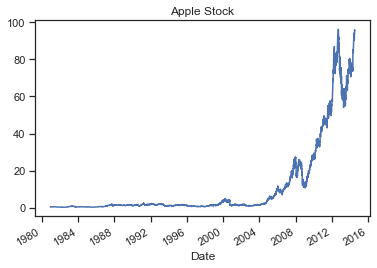

In [91]:
apple_open = apple['Adj Close'].plot(title ='Apple Stock')

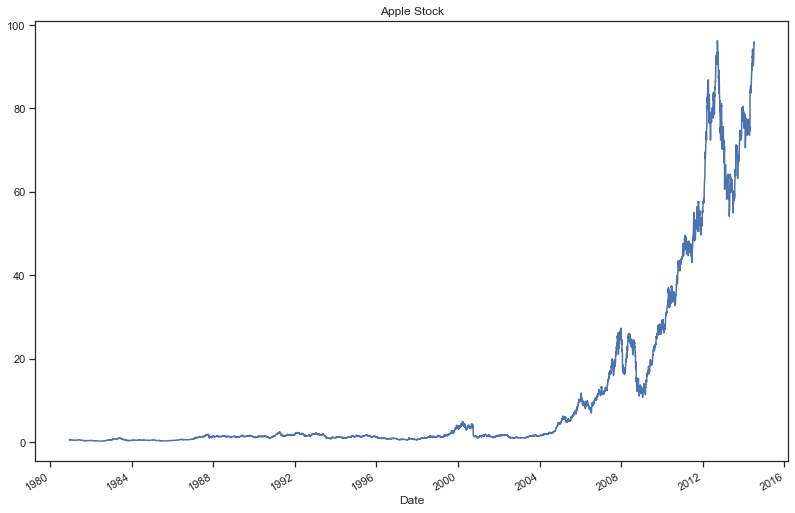

In [94]:
apple_open = apple['Adj Close'].plot(title ='Apple Stock')

# changes the size of the graph
fig = apple_open.get_figure()
fig.set_size_inches(13.5, 9)

!!! getting data from website

In [159]:
import pandas as pd
from pandas import DataFrame, Series
from pandas_datareader import data, wb
import pandas_datareader.data as web

In [160]:
import datetime
from datetime import datetime

In [161]:
start = datetime(2015,1,1)
end = datetime.today()
start

datetime.datetime(2015, 1, 1, 0, 0)

In [162]:
stocks =['AAPL','TSLA','IBM']

In [158]:
df = web.DataReader(stocks, 'yahoo', start, end)
df.items()

<generator object DataFrame.items at 0x000001F030215F48>

In [163]:
df2 = web.DataReader(stocks, 'yahoo', start, end)

In [165]:
df2.items

<bound method DataFrame.items of Attributes   Adj Close                               Close              \
Symbols           AAPL        TSLA         IBM        AAPL        TSLA   
Date                                                                     
2015-01-02  100.216454  219.309998  129.241516  109.330002  219.309998   
2015-01-05   97.393181  210.089996  127.207932  106.250000  210.089996   
2015-01-06   97.402374  211.279999  124.464600  106.260002  211.279999   
2015-01-07   98.768150  210.949997  123.651100  107.750000  210.949997   
2015-01-08  102.563072  210.619995  126.338654  111.889999  210.619995   
...                ...         ...         ...         ...         ...   
2020-04-16  286.690002  745.210022  115.730003  286.690002  745.210022   
2020-04-17  282.799988  753.890015  120.120003  282.799988  753.890015   
2020-04-20  276.929993  746.359985  120.410004  276.929993  746.359985   
2020-04-21  268.369995  686.719971  116.760002  268.369995  686.719971   
2020-

In [166]:
vol = df2['Volume']

In [168]:
vol.head()

Symbols           AAPL       TSLA        IBM
Date                                        
2015-01-02  53204600.0  4764400.0  5525500.0
2015-01-05  64285500.0  5368500.0  4880400.0
2015-01-06  65797100.0  6261900.0  6146700.0
2015-01-07  40105900.0  2968400.0  4701800.0
2015-01-08  59364500.0  3442500.0  4236800.0

In [171]:
vol['week'] = vol.index.week
vol['year'] = vol.index.year

week = vol.groupby(['week','year']).sum()
week

C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Symbols           AAPL        TSLA         IBM
week year                                     
1    2015   53204600.0   4764400.0   5525500.0
     2016  343790200.0  20975400.0  25253600.0
     2017  103845500.0  28576400.0  11943500.0
     2018  136171900.0  29713500.0  31378900.0
     2019  248189000.0  48890000.0  20960800.0
...                ...         ...         ...
52   2016   84828600.0  18385800.0   7771300.0
     2017   97163800.0  17184000.0  10643000.0
     2018  191160200.0  32237100.0  21630300.0
     2019   96609500.0  41953900.0   8887200.0
53   2015  123761500.0  10720500.0  13538600.0

[278 rows x 3 columns]

In [186]:
#del vol['week']
vol

Symbols          AAPL          TSLA           IBM
year                                             
2015     1.306605e+10  1.088218e+09  1.105583e+09
2016     9.682478e+09  1.162362e+09  1.018606e+09
2017     6.810776e+09  1.590031e+09  1.071166e+09
2018     8.539036e+09  2.161639e+09  1.368561e+09
2019     7.063803e+09  2.308078e+09  9.466952e+08
2020     3.674866e+09  1.575688e+09  5.187080e+08

In [189]:
#vol['year'] = vol.index.year
#vol = vol.groupby(['year']).sum()
#vol

In [190]:
es = web.DataReader('tran_sf_railac', 'eurostat')

https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

In [236]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')

In [237]:
chipo.head(10)
chipo.iloc[0,4]


'$2.39 '

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [199]:
x = chipo.item_name

In [201]:
item_count = Counter(x)
item_count

Counter({'Chips and Fresh Tomato Salsa': 110,
         'Izze': 20,
         'Nantucket Nectar': 27,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Chicken Bowl': 726,
         'Side of Chips': 101,
         'Steak Burrito': 368,
         'Steak Soft Tacos': 55,
         'Chips and Guacamole': 479,
         'Chicken Crispy Tacos': 47,
         'Chicken Soft Tacos': 115,
         'Chicken Burrito': 553,
         'Canned Soda': 104,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 59,
         'Carnitas Bowl': 68,
         'Bottled Water': 162,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Barbacoa Bowl': 66,
         'Chips': 211,
         'Chicken Salad Bowl': 110,
         'Steak Bowl': 211,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 95,
         'Veggie Bowl': 85,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Barbacoa Crispy Tacos': 11,
         'Veggie Salad Bowl': 1

In [211]:
df = pd.DataFrame.from_dict(item_count, orient = 'index')
len(df)


50

In [212]:
df = df[0].sort_values(ascending=True)[45:50]

In [213]:
df

Canned Soft Drink      301
Steak Burrito          368
Chips and Guacamole    479
Chicken Burrito        553
Chicken Bowl           726
Name: 0, dtype: int64

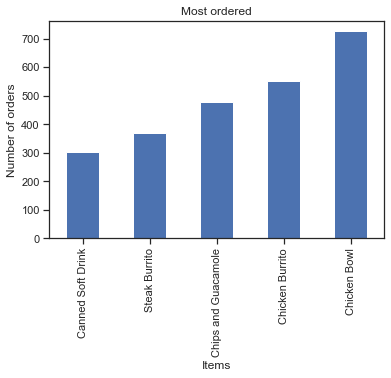

In [214]:
df.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of orders')
plt.title('Most ordered')

plt.show()

In [239]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]


In [240]:
chipo.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
6                                                NaN        1.69  
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...       11.75  
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...        9.25  
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...        9.25

In [222]:
orders = chipo.groupby('order_id').sum()
orders.head()

quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70

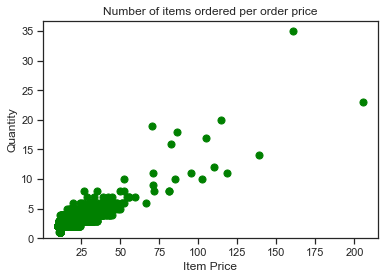

In [241]:
plt.scatter(x=orders.item_price, y=orders.quantity, s=50, c='green')
plt.xlabel('Item Price')
plt.ylabel('Quantity')
plt.title('Number of items ordered per order price')
plt.ylim(0)
plt.show()

In [238]:
s = '$2.39'
s = s[1:-2]
s

'2.'

!!!Scores
<br>
https://github.com/guipsamora/pandas_exercises/blob/master/07_Visualization/Scores/Exercises.ipynb

In [242]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import matplotlib.pyplot as plt

In [243]:
%matplotlib inline

In [244]:
raw_data = { 'first_name':['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
            'last_name':['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
            'female':[0, 1, 1, 0, 1],
            'age':[42, 52, 36, 24, 73],
            'preTestScore':[4, 24, 31, 2, 3],
            'postTestScore':[25, 94, 57, 62, 70] }

In [247]:
student_df = pd.DataFrame(raw_data, columns=['first_name', 'last_name', 'age', 'female', 'preTestScore', 'postTestScore'])

In [248]:
student_df

first_name last_name  age  female  preTestScore  postTestScore
0      Jason    Miller   42       0             4             25
1      Molly  Jacobson   52       1            24             94
2       Tina       Ali   36       1            31             57
3       Jake    Milner   24       0             2             62
4        Amy     Cooze   73       1             3             70

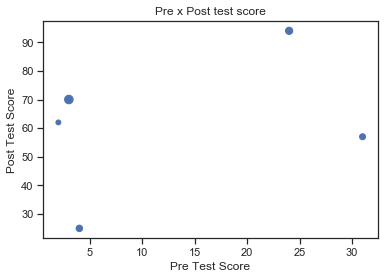

In [252]:
plt.scatter(student_df.preTestScore, student_df.postTestScore, s=student_df.age)
plt.xlabel('Pre Test Score')
plt.ylabel('Post Test Score')
plt.title('Pre x Post test score')
plt.show()

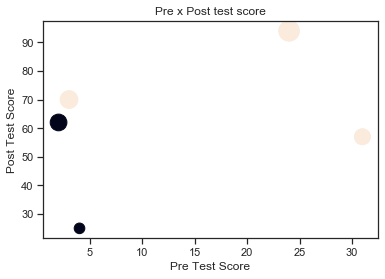

In [254]:
plt.scatter(student_df.preTestScore, student_df.postTestScore, s = student_df.postTestScore * 4.5, c = student_df.female)
plt.xlabel('Pre Test Score')
plt.ylabel('Post Test Score')
plt.title('Pre x Post test score')
plt.show()

https://github.com/guipsamora/pandas_exercises